In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from IPython.display import HTML, display, Markdown, Latex
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#Configuraçôes 

warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)
plt.style.use("seaborn-darkgrid")

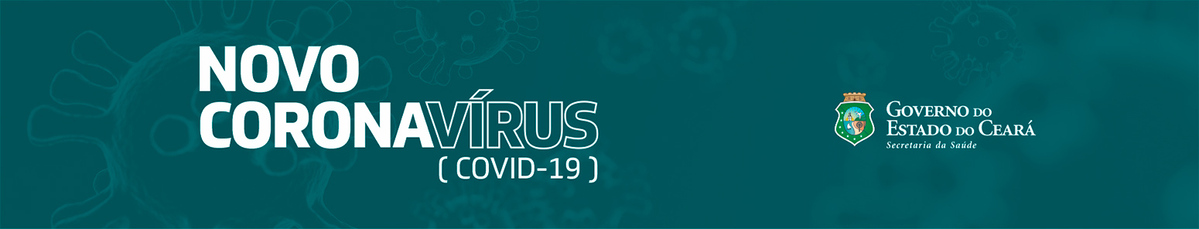

In [2]:
from PIL import Image
Image.open('./img/top_novo_coronavirus.jpg')

# Clique no botão a baixo para mostar o codigo

In [3]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Mostar o código."></form>''')

 Etapas
 ===
 
 
1 Aquisição de dados
---
    
    1.1 Obter dados
    1.2 Descompactar 
    1.3 Listar arquivos 
    1.4 Carregar os dados
    
2 Analizar o dataset
---
    2.1 anaizar o tamanho da base
    2.2 analizar os tipos das colunas
    2.3 definir quais colunas seram utilizadas
    2.4 analizar e altear os tipos dos dados
    2.5 analise descritiva

### 1.1 Obter dados

In [4]:
import requests

url = 'http://download-integrasus.saude.ce.gov.br/casos_covid19'
downloads_path = 'downloads/'
datasets_path = 'datasets/'
file_name = 'casos_covid19.zip'

resposta = requests.get(url)

with open(downloads_path+file_name, 'wb') as novo_arquivo:
    novo_arquivo.write(resposta.content)


### 1.2 Descompactar arquivo

Os dados vem compactados em uma arquivo forto .zip, precisamos descompactalos. 

In [5]:
from zipfile import ZipFile

z = ZipFile(downloads_path+file_name, 'r')
z.extractall(datasets_path)
z.close()

### 1.3 Listar arquivos 

In [6]:
import os

files = os.listdir(datasets_path)
files

['casos_coronavirus_2020_12_07.csv',
 'casos_coronavirus_2020_12_08.csv',
 'casos_coronavirus_2020_12_11.csv',
 'casos_coronavirus_localidade_2020_12_07.csv',
 'casos_coronavirus_localidade_2020_12_08.csv',
 'casos_coronavirus_localidade_2020_12_11.csv',
 'old',
 'populacao_2010.csv']

In [7]:
#for i,file in zip(range(len(files)), files):
    #print(f'indice: {i} nome: {file}')

#import pandas as pd 
#for i,file in zip(range(len(files)), files):
    #df_i = pd.read_csv(datasets_path+file, sep=';')

### 1.4 Carregar os dados

In [8]:
import pandas as pd

df = pd.read_csv(datasets_path+files[2], sep=';')

### 2.1 anaizar o tamanho da base


In [9]:
tamanho = df.shape
print(f'São {tamanho[0]} linhas e {tamanho[1]} colunas')

São 1421116 linhas e 62 colunas


Essas são as ultimas linhas do arquivo.

In [10]:
#df.head()
df.tail()
#df.describe() # usar isso em casos por municipio.
#df_casos.columns
#df_casos.dtypes

,identificadorCaso,idRedcap,idEsus,idSivep,classificacaoEstadoRedcap,classificacaoEstadoEsus,classificacaoFinalEsus,evolucaoCasoEsus,cboEsus,profissionalSaudeEsus,...,municipioNotificacaoEsus,tipoObitoMaterno,classificacaoFinalCasoSivep,gestante,tipoTesteEsus,obitoConfirmado,dataObito,classificacaoObito,localObito,tipoLocalObito
1421111,99a781735d14dcfea8dc286731ed93c7,NaN,2.3201e+11,NaN,NaN,NaN,NaN,NaN,NaN,False,...,FORTALEZA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1421112,a3689b81c06f2dfde5936cefd510641e,NaN,2.32005e+11,NaN,NaN,Positivo,NaN,NaN,3222 - Técnico ou Auxiliar em Enfermagem,True,...,ARACATI,NaN,NaN,NaN,TESTE RÁPIDO - ANTICORPO,NaN,NaN,NaN,NaN,NaN
1421113,c5c3424b864be1d5c1c61da3cd425f9c,NaN,4.22017e+11,NaN,NaN,Positivo,NaN,NaN,NaN,False,...,JOINVILLE,NaN,NaN,NaN,TESTE RÁPIDO - ANTICORPO,NaN,NaN,NaN,NaN,NaN
1421114,0f9944b2777c7b0be7ee2f28353beb82,NaN,2.32023e+11,NaN,NaN,NaN,NaN,NaN,NaN,False,...,FORTALEZA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1421115,e043736d58629522a4d031f048206772,NaN,2.32009e+11,NaN,NaN,NaN,Descartado,Cura,NaN,False,...,FORTALEZA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


O arquivo completo possue essas linhas

In [11]:
df.columns.tolist()

['identificadorCaso',
 'idRedcap',
 'idEsus',
 'idSivep',
 'classificacaoEstadoRedcap',
 'classificacaoEstadoEsus',
 'classificacaoFinalEsus',
 'evolucaoCasoEsus',
 'cboEsus',
 'profissionalSaudeEsus',
 'paisCaso',
 'estadoCaso',
 'codigoMunicipioCaso',
 'municipioCaso',
 'bairroCaso',
 'bairroCasoGeocoder',
 'sexoCaso',
 'idadeCaso',
 'faixaEtaria',
 'dataNascimento',
 'dataNotificacao',
 'dataInicioSintomas',
 'dataSolicitacaoExame',
 'dataColetaExame',
 'dataResultadoExame',
 'resultadoFinalExame',
 'laboratorioExame',
 'classificacaoEstadoSivep',
 'dataInternacaoSivep',
 'dataEntradaUTISivep',
 'dataSaidaUTISivep',
 'evolucaoCasoSivep',
 'dataEvolucaoCasoSivep',
 'comorbidadePuerperaSivep',
 'comorbidadeCardiovascularSivep',
 'comorbidadeHematologiaSivep',
 'comorbidadeSindromeDownSivep',
 'comorbidadeHepaticaSivep',
 'comorbidadeAsmaSivep',
 'comorbidadeDiabetesSivep',
 'comorbidadeNeurologiaSivep',
 'comorbidadePneumopatiaSivep',
 'comorbidadeImunodeficienciaSivep',
 'comorbidade

Transformando o tipo dos campos de Data

In [12]:
datas = ['dataNascimento',
 'dataNotificacao',
 'dataInicioSintomas',
 'dataSolicitacaoExame',
 'dataColetaExame',
 'dataResultadoExame',
 'dataInternacaoSivep',
 'dataEntradaUTISivep',
 'dataSaidaUTISivep',
 'dataEvolucaoCasoSivep',
 'dataNotificacaoObito',
 'dataObito']
         
for data in datas:
  df[data] = df[data].astype('datetime64', errors = 'ignore')

### Curva Epidemiológica

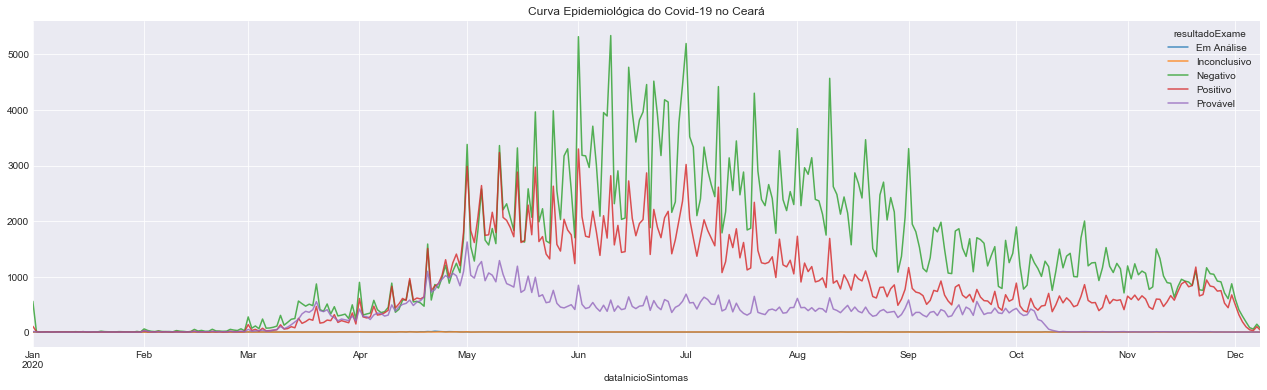

In [13]:
ts = df[['dataInicioSintomas','identificadorCaso','resultadoFinalExame']].groupby(['dataInicioSintomas', 'resultadoFinalExame']).agg('count')

df_resultados = ts[:-4:].reset_index()
df_resultados.columns =  ['dataInicioSintomas', 'resultadoExame', 'Casos']
df_resultados.set_index('dataInicioSintomas', inplace = True)

df_resultados = df_resultados.pivot(columns='resultadoExame',values="Casos").fillna(0)

ax = df_resultados.plot(alpha=0.8,figsize=(22,6), title='Curva Epidemiológica do Covid-19 no Ceará')

## Apenas os positivos

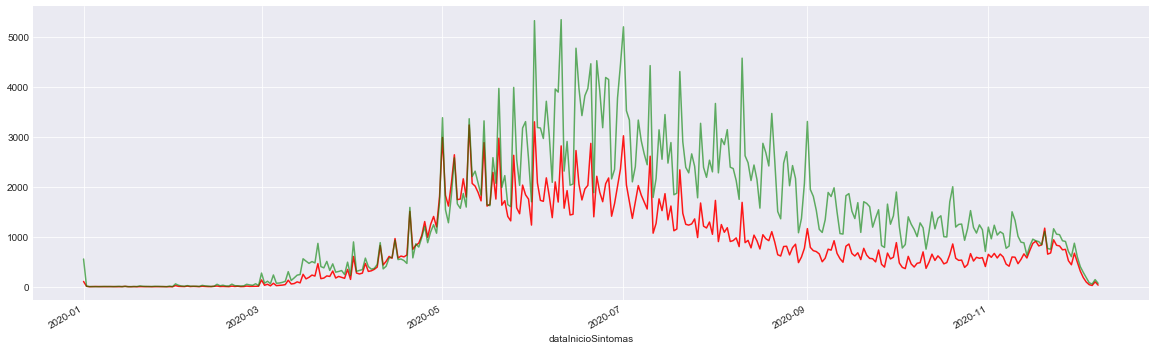

In [91]:
plt.figure(figsize=(20,6))


with pd.plotting.plot_params.use('x_compat', True):
    df_resultados['Positivo'].plot(color='r', alpha=0.9)
    df_resultados['Negativo'].plot(color='g', alpha=0.6)


## positividade dos exames

In [15]:
df_positividade = df[['dataResultadoExame','resultadoFinalExame']].groupby([
    df['dataResultadoExame'].dt.week, 'resultadoFinalExame']).agg('count').rename(columns={'dataResultadoExame': 'Casos'})

In [16]:
df_positividade = df_positividade.reset_index()

In [17]:
df_positividade.head()

,dataResultadoExame,resultadoFinalExame,Casos
0,1.0,Negativo,9
1,1.0,Positivo,4
2,2.0,Negativo,9
3,2.0,Positivo,3
4,3.0,Negativo,6


In [18]:
df_positividade = df_positividade.pivot(index='dataResultadoExame', columns='resultadoFinalExame', values='Casos')

In [19]:
df_positividade = df_positividade.fillna(0)

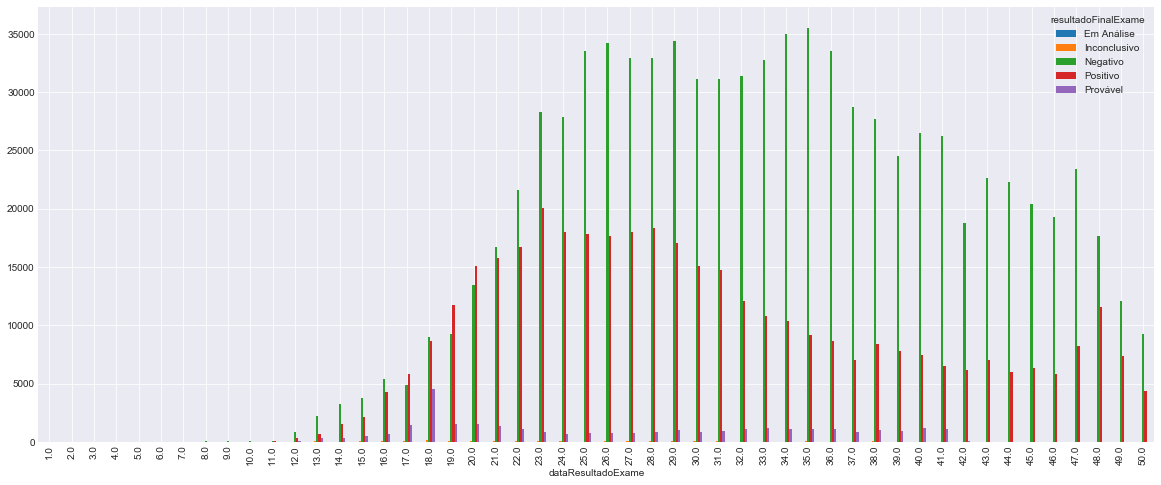

In [20]:
df_positividade.plot(kind='bar', figsize=(20,8))

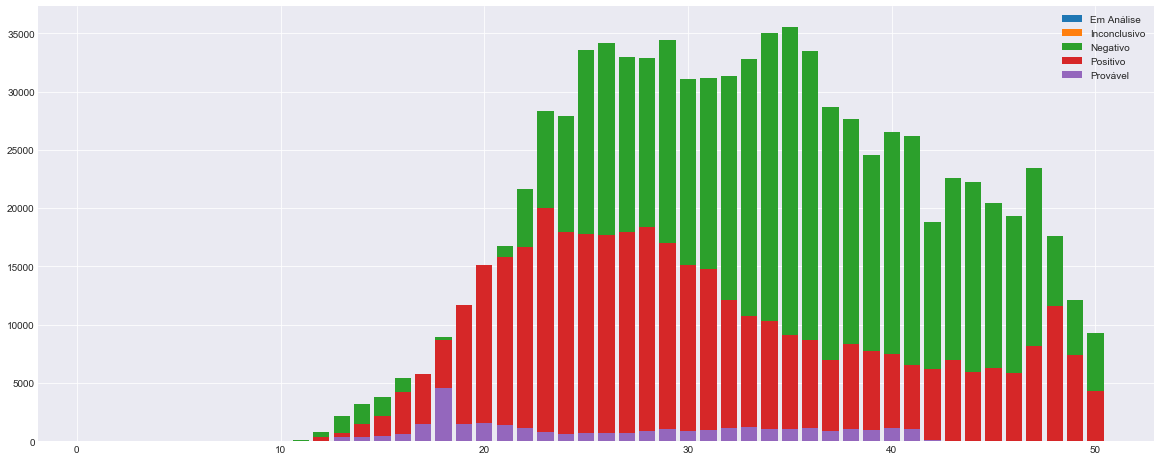

In [21]:
plt.figure(figsize=(20,8))

width = 0.35       # the width of the bars: can also be len(x) sequence

ind = df_positividade.index.tolist()

for column in df_positividade.columns:
    p1 = plt.bar(ind, df_positividade[column])

plt.legend(df_positividade.columns)
plt.show()


In [22]:
df_positividade['% positivos'] = df_positividade['Positivo']/(df_positividade['Positivo']+df_positividade['Negativo'])
df_positividade['% negativos'] = df_positividade['Negativo']/(df_positividade['Negativo']+df_positividade['Positivo'])

In [23]:
df_positividade.head()

resultadoFinalExame,Em Análise,Inconclusivo,Negativo,Positivo,Provável,% positivos,% negativos
dataResultadoExame,,,,,,,
1.0,0.0,0.0,9.0,4.0,0.0,0.307692,0.692308
2.0,0.0,0.0,9.0,3.0,0.0,0.250000,0.750000
3.0,0.0,0.0,6.0,2.0,0.0,0.250000,0.750000
4.0,0.0,0.0,7.0,4.0,1.0,0.363636,0.636364
5.0,0.0,0.0,24.0,7.0,1.0,0.225806,0.774194


Fazer garfico de barras empilhadas

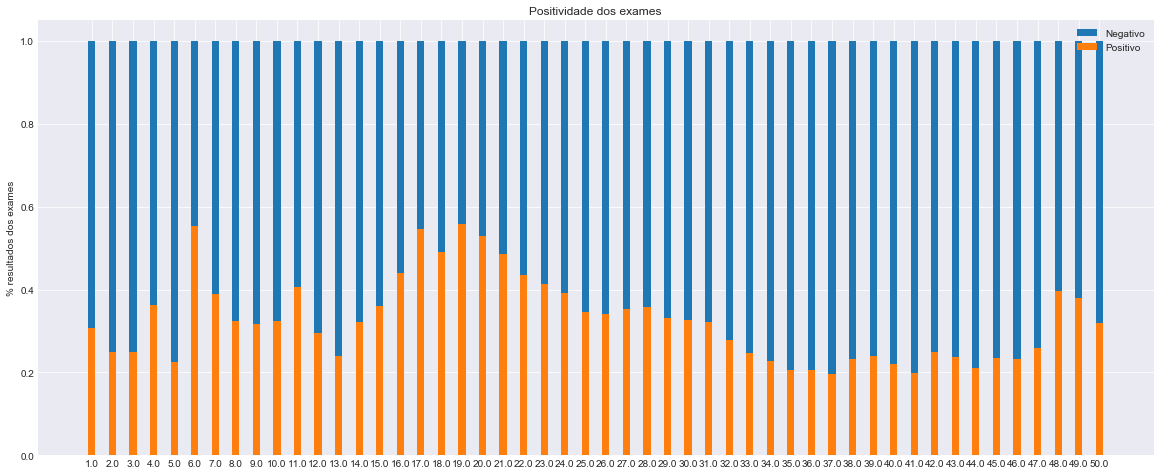

In [24]:
plt.figure(figsize=(20,8))

Negativo = df_positividade['% negativos']
Positivo = df_positividade['% positivos']
width = 0.35       # the width of the bars: can also be len(x) sequence

ind = df_positividade.index.tolist()
p1 = plt.bar(ind, Negativo, width, bottom=Positivo)
p2 = plt.bar(ind, Positivo, width, )

plt.ylabel('% resultados dos exames')
plt.title('Positividade dos exames')
plt.xticks(ind, df_positividade.index.tolist())
plt.legend((p1[0], p2[0]), ('Negativo', 'Positivo'))

plt.show()


## Casos confirmados

In [25]:
df_positovos = df[(df["resultadoFinalExame"] == 'Positivo')&
                              (df["estadoCaso"] == 'CE')]

In [26]:
len(df_positovos['identificadorCaso'].unique())

309811

In [27]:
df_positovos.shape

(391481, 62)

Text(0, 0.5, 'Casos confirmados')

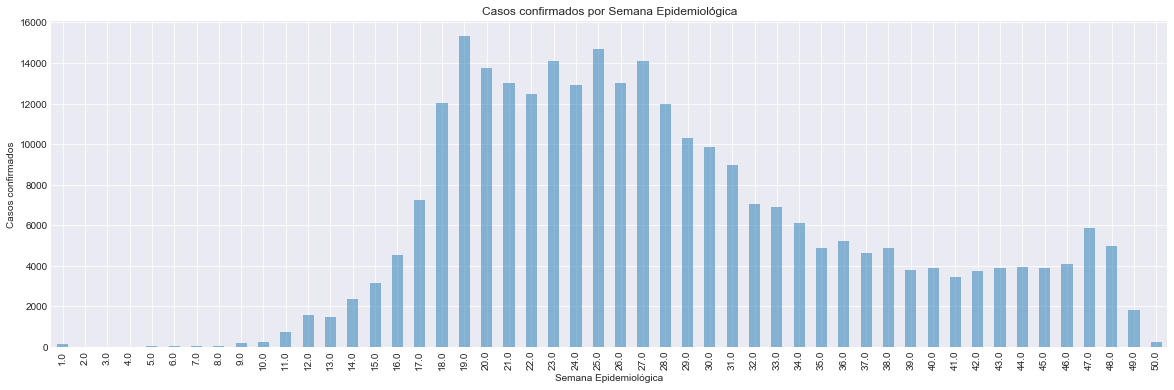

In [28]:
ts_positovos = df_positovos.groupby(df_positovos['dataInicioSintomas'].dt.week).dataInicioSintomas.count()
ax = ts_positovos.plot(kind='bar',alpha=0.5,figsize=(20,6), title='Casos confirmados por Semana Epidemiológica')
ax.set_xlabel('Semana Epidemiológica')
ax.set_ylabel('Casos confirmados')

#todo: colocar label para Semana 50

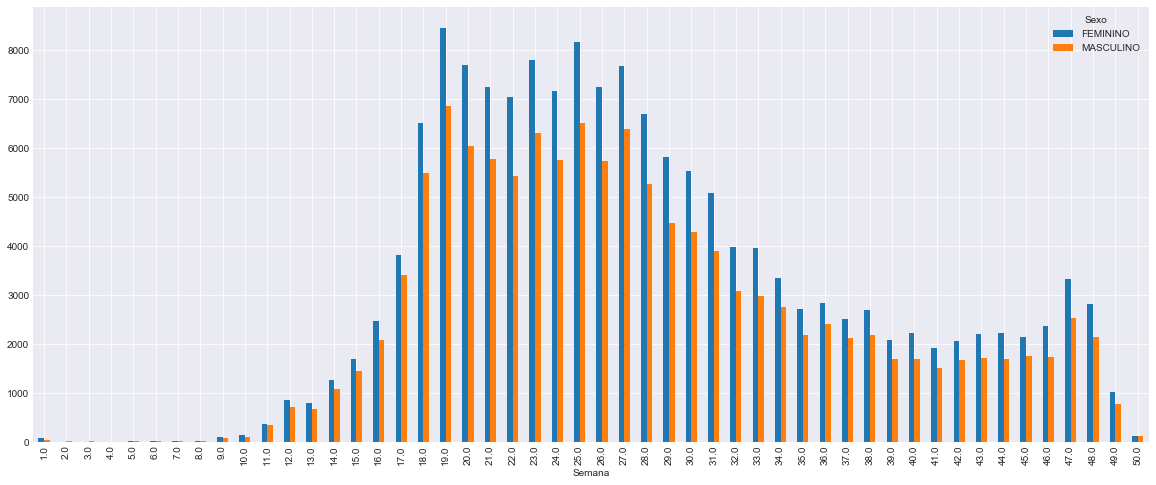

In [29]:
df_caso_sexo = df_positovos[['dataInicioSintomas','sexoCaso']].groupby([
    df_positovos['dataInicioSintomas'].dt.week, 'sexoCaso']).agg('count').rename(columns={'dataInicioSintomas': 'Casos'})

df_caso_sexo = df_caso_sexo.reset_index()

df_caso_sexo.columns = ['Semana', 'Sexo', 'Casos']

df_caso_sexo = df_caso_sexo.pivot(index='Semana',columns='Sexo',values="Casos")

df_caso_sexo.plot(kind='bar', figsize=(20,8))

In [30]:
df_caso_cor = df_positovos[['dataInicioSintomas','racaCor']].groupby([
    df_positovos['dataInicioSintomas'].dt.week, 'racaCor']).agg('count').rename(columns={'dataInicioSintomas': 'Casos'})

df_caso_cor = df_caso_cor.reset_index()

df_caso_cor.columns = ['Semana', 'Cor', 'Casos']

df_caso_cor.head()

,Semana,Cor,Casos
0,1.0,Amarela,22
1,1.0,Branca,23
2,1.0,Ignorado,7
3,1.0,Parda,61
4,1.0,Preta,3


In [31]:
df_caso_cor.head()

,Semana,Cor,Casos
0,1.0,Amarela,22
1,1.0,Branca,23
2,1.0,Ignorado,7
3,1.0,Parda,61
4,1.0,Preta,3


In [32]:
df_caso_cor_pivot = df_caso_cor.pivot(index='Semana',columns='Cor',values="Casos")
df_caso_cor_pivot = df_caso_cor_pivot.fillna(0)

In [33]:
df_caso_cor_pivot.head()

Cor,Amarela,Branca,Ignorado,Indígena,Parda,Preta
Semana,,,,,,
1.0,22.0,23.0,7.0,0.0,61.0,3.0
2.0,4.0,2.0,0.0,0.0,5.0,1.0
3.0,1.0,3.0,1.0,0.0,7.0,0.0
4.0,0.0,0.0,0.0,0.0,5.0,1.0
5.0,5.0,6.0,2.0,0.0,21.0,0.0


In [34]:
sum_column = df_caso_cor_pivot.sum(axis=0)
sum_column.sort_values(ascending=False)

Cor
Parda       160172.0
Branca       46397.0
Amarela      34452.0
Ignorado      7386.0
Preta         6382.0
Indígena      1246.0
dtype: float64

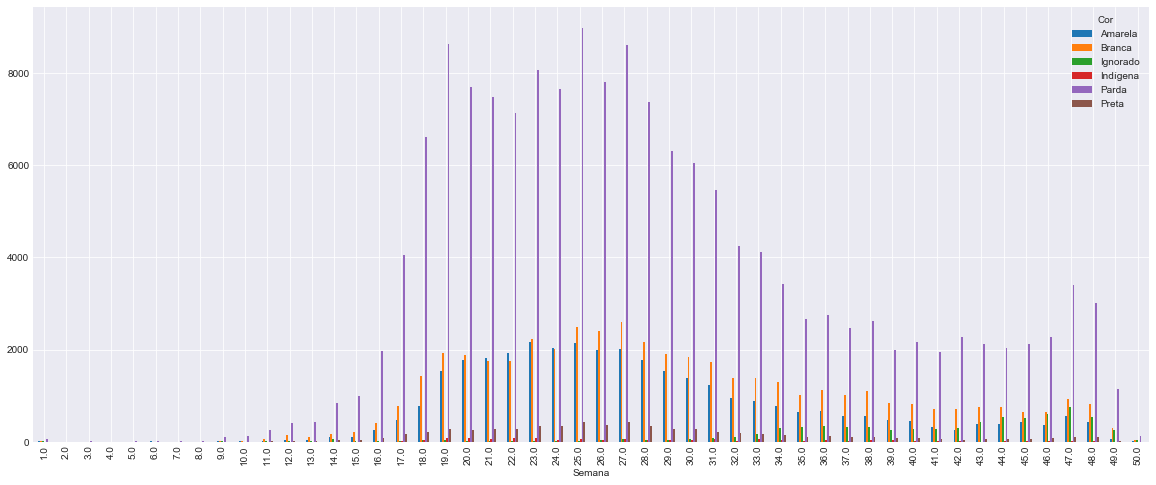

In [35]:
df_caso_cor_pivot.plot(kind='bar', figsize=(20,8))

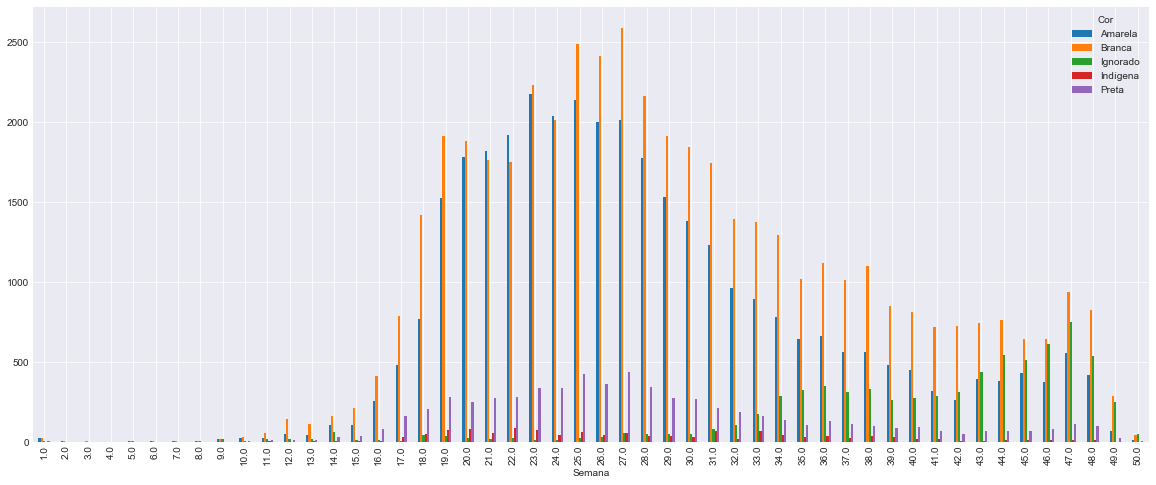

In [36]:
df_caso_cor_pivot[['Amarela','Branca','Ignorado','Indígena','Preta']].plot(kind='bar', figsize=(20,8))

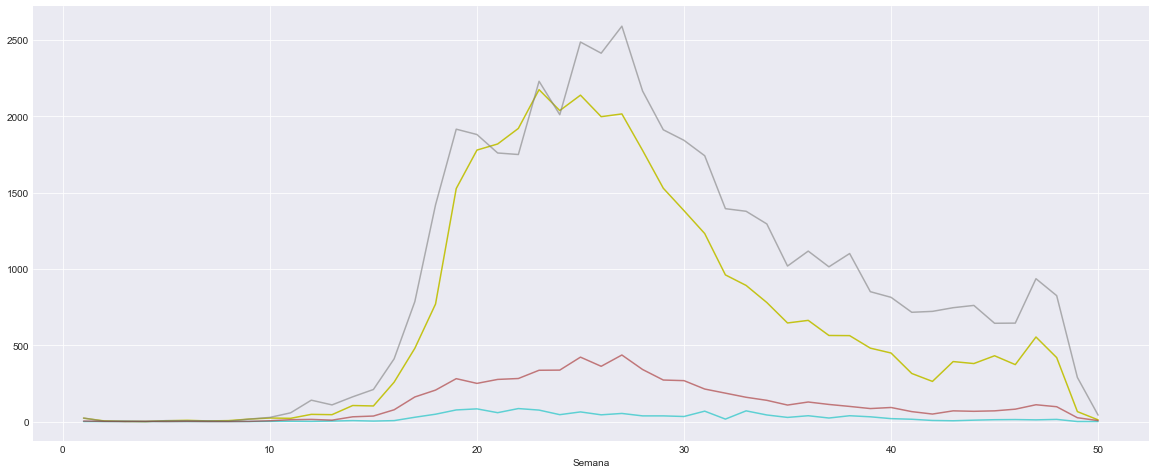

In [37]:
plt.figure(figsize=(20,8))

with pd.plotting.plot_params.use('x_compat', True):
    df_caso_cor_pivot['Amarela'].plot(color='y', alpha=0.9)
    df_caso_cor_pivot['Branca'].plot(color='gray', alpha=0.6)
    df_caso_cor_pivot['Indígena'].plot(color='c', alpha=0.6)
    df_caso_cor_pivot['Preta'].plot(color='brown', alpha=0.6)

### Casos por faixa etária

In [38]:
df_faixa_etaria = df_positovos[['dataInicioSintomas','faixaEtaria', 'sexoCaso']].groupby(
    ['faixaEtaria', 'sexoCaso']).agg('count').rename(columns={'dataInicioSintomas': 'Casos'})

In [39]:
df_faixa_etaria.reset_index(inplace=True)

In [40]:
df_faixa_etaria.head()

,faixaEtaria,sexoCaso,Casos
0,00 a 04 anos,FEMININO,3127
1,00 a 04 anos,MASCULINO,3241
2,05 a 09 anos,FEMININO,2678
3,05 a 09 anos,MASCULINO,2651
4,10 a 14 anos,FEMININO,3515


In [41]:
df_faixa_etaria_pivot = df_faixa_etaria.pivot(index='faixaEtaria',columns='sexoCaso',values='Casos')

In [42]:
#df_faixa_etaria_pivot.plot(kind='bar', figsize=(16,8))

In [43]:
populacao_ce = pd.read_csv('datasets/populacao_2010.csv')
populacao_ce.set_index('faixaEtaria', inplace=True)

In [44]:
populacao_ce.head()

,Homens,Mulheres
faixaEtaria,,
80 ou mais,64707,88865
75 a 79 anos,48627,63394
70 a 74 anos,75849,95031
65 a 69 anos,93990,111093
60 a 64 anos,123545,144374


Piramide etária do Ceará [2010]

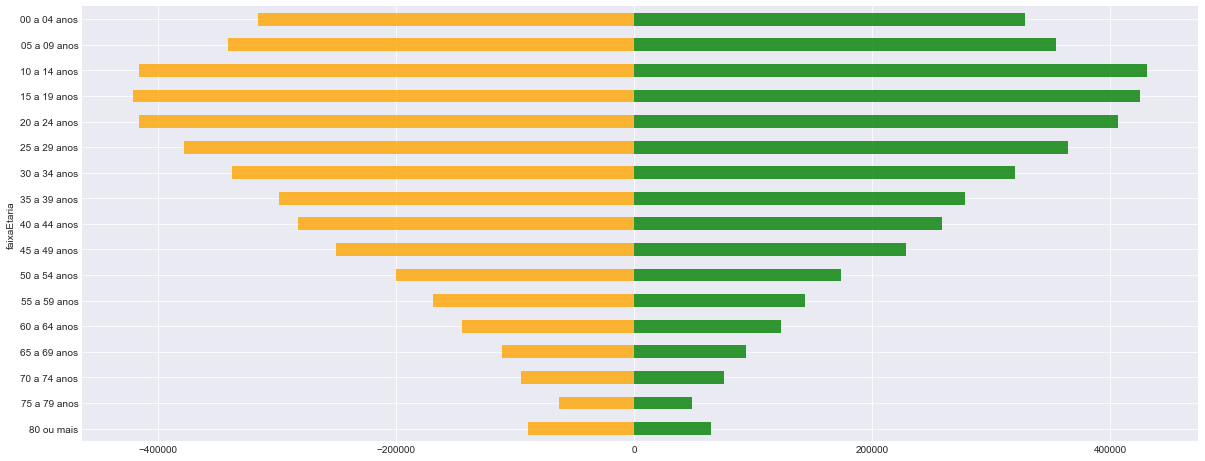

In [45]:
plt.figure(figsize=(20,8))

with pd.plotting.plot_params.use('x_compat', True):
    populacao_ce['Homens'].plot.barh(color='green', alpha=0.8)
    (-populacao_ce['Mulheres']).plot.barh(color='orange', alpha=0.8)

In [46]:
#populacao_ce.plot(kind='bar', figsize=(20,8))

In [47]:
df_faixa_etaria_pivot.head()

sexoCaso,FEMININO,MASCULINO
faixaEtaria,,
00 a 04 anos,3127,3241
05 a 09 anos,2678,2651
10 a 14 anos,3515,3242
15 a 19 anos,6451,5186
20 a 24 anos,13299,10397


In [48]:
df_faixa_etaria_pivot_poulacao = pd.merge(df_faixa_etaria_pivot, populacao_ce, left_index=True, right_index=True)

In [49]:
df_faixa_etaria_pivot_poulacao['%h'] = (df_faixa_etaria_pivot_poulacao['MASCULINO']/df_faixa_etaria_pivot_poulacao['Homens'])*100
df_faixa_etaria_pivot_poulacao['%m'] = (df_faixa_etaria_pivot_poulacao['FEMININO']/df_faixa_etaria_pivot_poulacao['Mulheres'])*100

In [50]:
df_faixa_etaria_pivot_poulacao = df_faixa_etaria_pivot_poulacao[['MASCULINO', 'FEMININO','Homens','Mulheres','%h','%m']]

In [51]:
df_faixa_etaria_pivot_poulacao.columns = ['Casos confirmados em homens', 'Casos confirmados em mulheres',
                                          'Homens no Ceará','Mulheres no Ceará',
                                          'Percentual de homens infectados','Percentual de mulheres infectadas']

In [52]:
df_faixa_etaria_pivot_poulacao.head()

,Casos confirmados em homens,Casos confirmados em mulheres,Homens no Ceará,Mulheres no Ceará,Percentual de homens infectados,Percentual de mulheres infectadas
faixaEtaria,,,,,,
00 a 04 anos,3241,3127,328694,316006,0.986023,0.989538
05 a 09 anos,2651,2678,354622,341621,0.747557,0.783910
10 a 14 anos,3242,3515,431154,416153,0.751936,0.844641
15 a 19 anos,5186,6451,425466,421375,1.218899,1.530940
20 a 24 anos,10397,13299,406534,416303,2.557474,3.194548


In [53]:
#df_faixa_etaria_pivot_poulacao[['MASCULINO', 'FEMININO']].plot(kind='bar',figsize=(20,8))

In [54]:
#df_faixa_etaria_pivot_poulacao[['Homens', 'Mulheres']].plot(kind='bar',figsize=(20,8))

In [55]:
#df_faixa_etaria_pivot_poulacao[['%h', '%m']].plot(kind='bar',figsize=(20,8))

Estranho, eu esperava que esse grafico fosse uma distribuição normal

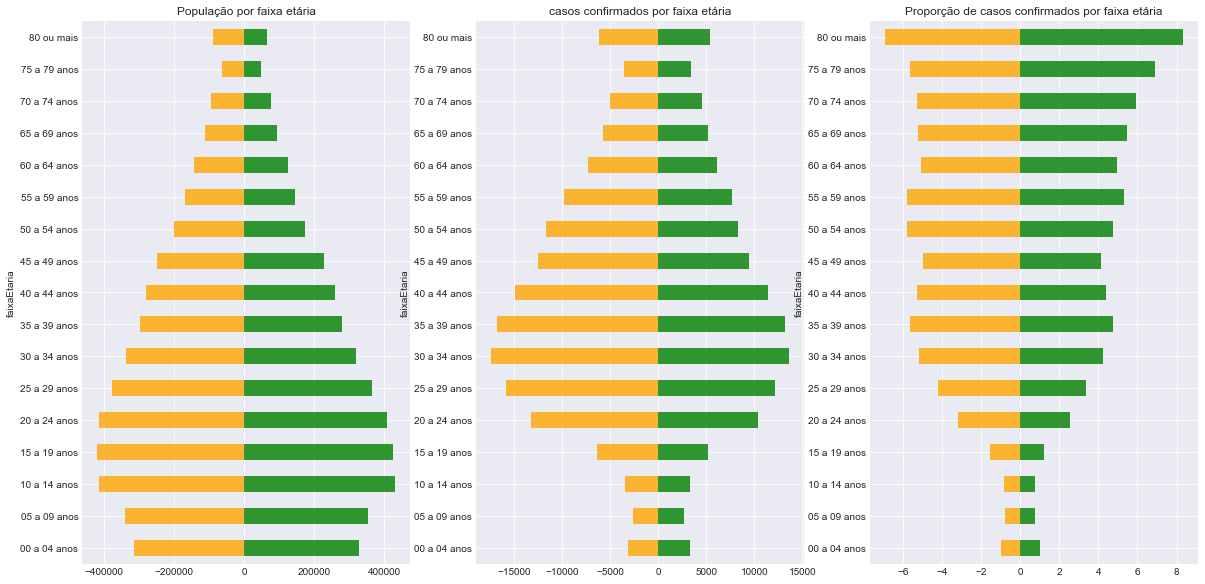

In [100]:

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,10))

plt.subplots_adjust(wspace=0.2, hspace=0.1)

with pd.plotting.plot_params.use('x_compat', True, ):
    df_faixa_etaria_pivot_poulacao['Homens no Ceará'].plot.barh(color='green',
                                                                alpha=0.8, ax=axes[0], title='População por faixa etária')
    (-df_faixa_etaria_pivot_poulacao['Mulheres no Ceará']).plot.barh(color='orange', alpha=0.8,ax=axes[0])
    #plt.title('População por faixa etária')

with pd.plotting.plot_params.use('x_compat', True, ):
    df_faixa_etaria_pivot_poulacao['Casos confirmados em homens'].plot.barh(color='green',
                                                                            alpha=0.8, ax=axes[1], title='casos confirmados por faixa etária')
    (-df_faixa_etaria_pivot_poulacao['Casos confirmados em mulheres']).plot.barh(color='orange', alpha=0.8,ax=axes[1])
     #plt.title('casos confirmados por faixa etária')

with pd.plotting.plot_params.use('x_compat', True, ):
    df_faixa_etaria_pivot_poulacao['Percentual de homens infectados'].plot.barh(color='green',
                                                                                alpha=0.8, ax=axes[2], title='Proporção de casos confirmados por faixa etária')
    (-df_faixa_etaria_pivot_poulacao['Percentual de mulheres infectadas']).plot.barh(color='orange', alpha=0.8,ax=axes[2])
    #plt.title('Proporção de casos confirmados por faixa etária')

#df_faixa_etaria_pivot_poulacao['Homens'].plot(kind='bar',figsize=(10,8), ax=axes[0, 0])
#axes[0, 0].set_title('Homens no Ceará por faixa etaria');

#df_faixa_etaria_pivot_poulacao['Mulheres'].plot(kind='bar',figsize=(10,8), ax=axes[0, 1])
#axes[0, 1].set_title('Mulheres no Ceará por faixa etaria');

#df_faixa_etaria_pivot_poulacao['MASCULINO'].plot(kind='bar',figsize=(10,8), ax=axes[1, 0])
#axes[1, 0].set_title('Casos confirmados em homens no Ceará por faixa etaria');

#df_faixa_etaria_pivot_poulacao['FEMININO'].plot(kind='bar',figsize=(10,8), ax=axes[1, 1])
#axes[1, 1].set_title('Casos confirmados em mulheres no Ceará por faixa etaria');

#df_faixa_etaria_pivot_poulacao['%h'].plot(kind='bar',figsize=(20,8), ax=axes[2, 0])
#axes[2, 0].set_title('Percentual de homens infectados por covid-19 por faixa etaria');

#df_faixa_etaria_pivot_poulacao['%m'].plot(kind='bar',figsize=(20,8), ax=axes[2, 1])
#axes[2, 1].set_title('Percentual de mulheres infectadas por covid-19 por faixa etaria');


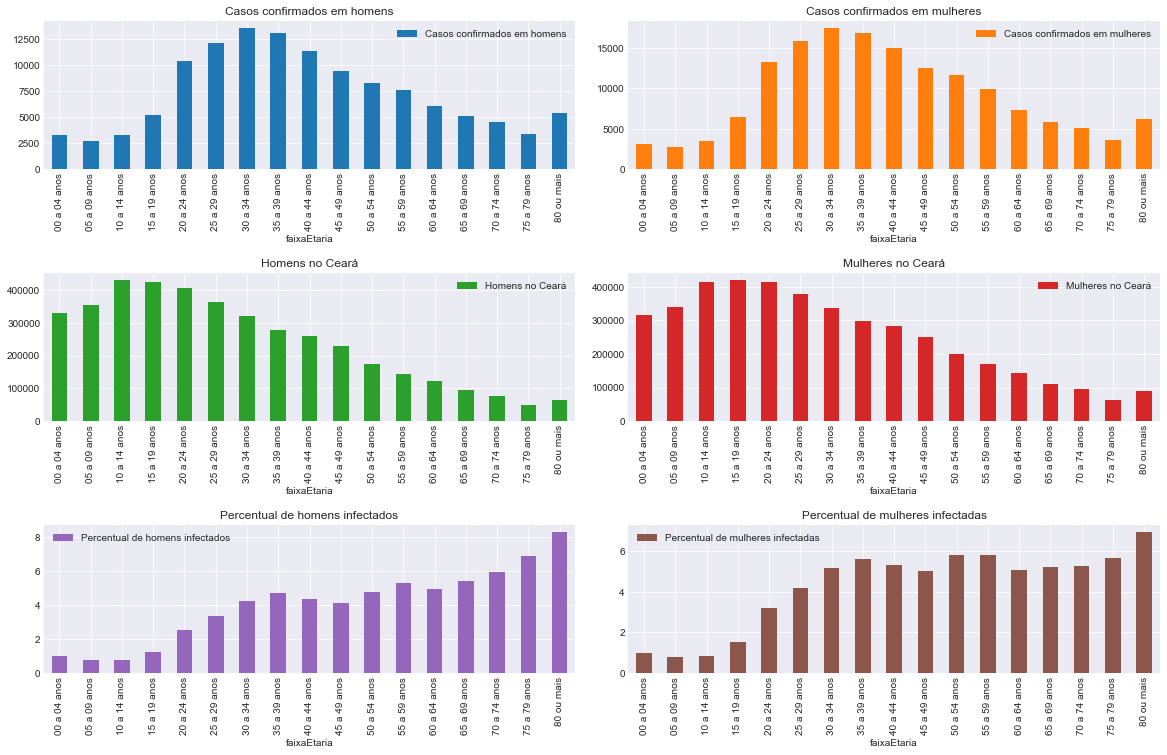

In [57]:
fig, axes = plt.subplots(3, 2, figsize=(20, 12))

plt.subplots_adjust(wspace=0.1, hspace=0.7)
target1 = [axes[0][0], axes[0][1], axes[1][0], axes[1][1], axes[2][0], axes[2][1]]
df_faixa_etaria_pivot_poulacao.plot(kind='bar',subplots=True, ax=target1, legend=True, sharex=False, sharey=False);

### Curva de obitos

In [58]:
df['obitoConfirmado'].unique()

array([nan, True, False], dtype=object)

In [59]:
df_obito = df.dropna(subset=["obitoConfirmado"], axis=0)

In [60]:
df_obito['obitoConfirmado'].unique()

array([True, False], dtype=object)

In [61]:
df_obito.shape

(12048, 62)

In [62]:
df_obito_classificacao = df_obito[['obitoConfirmado', 'classificacaoObito','identificadorCaso']].groupby(['obitoConfirmado', 'classificacaoObito']).agg('count')
df_obito_classificacao

identificadorCaso
obitoConfirmado classificacaoObito                       
False           Em investigação                       592
True            Confirmado                           8389
                Confirmado pelo comitê                 28
                SRAG Teste Rápido +                  3039

In [63]:
df_obito_confirmado = df_obito_classificacao.loc[True]

In [64]:
ts = df_obito[['dataObito','obitoConfirmado','classificacaoObito']].groupby(['dataObito', 'classificacaoObito']).agg('count')
df_obito_ts = ts.reset_index()

In [65]:
df_obito_ts.head()

,dataObito,classificacaoObito,obitoConfirmado
0,2020-03-02,Em investigação,1
1,2020-03-23,Em investigação,1
2,2020-03-24,Confirmado,4
3,2020-03-25,Confirmado,2
4,2020-03-26,Confirmado,4


In [66]:
df_obito_ts_pivot = df_obito_ts.pivot(index='dataObito',columns='classificacaoObito',values='obitoConfirmado')

In [67]:
df_obito_ts_pivot= df_obito_ts_pivot.fillna(0)

In [68]:
df_obito_ts_pivot.head()

classificacaoObito,Confirmado,Confirmado pelo comitê,Em investigação,SRAG Teste Rápido +
dataObito,,,,
2020-03-02,0.0,0.0,1.0,0.0
2020-03-23,0.0,0.0,1.0,0.0
2020-03-24,4.0,0.0,0.0,0.0
2020-03-25,2.0,0.0,0.0,0.0
2020-03-26,4.0,0.0,0.0,0.0


fazer barra empilhada

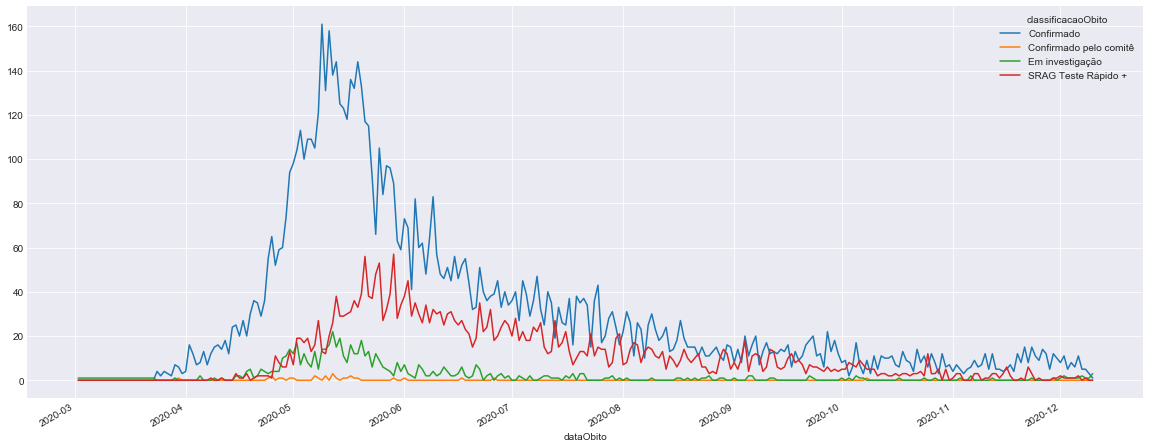

In [69]:
df_obito_ts_pivot.plot(figsize=(20,8))

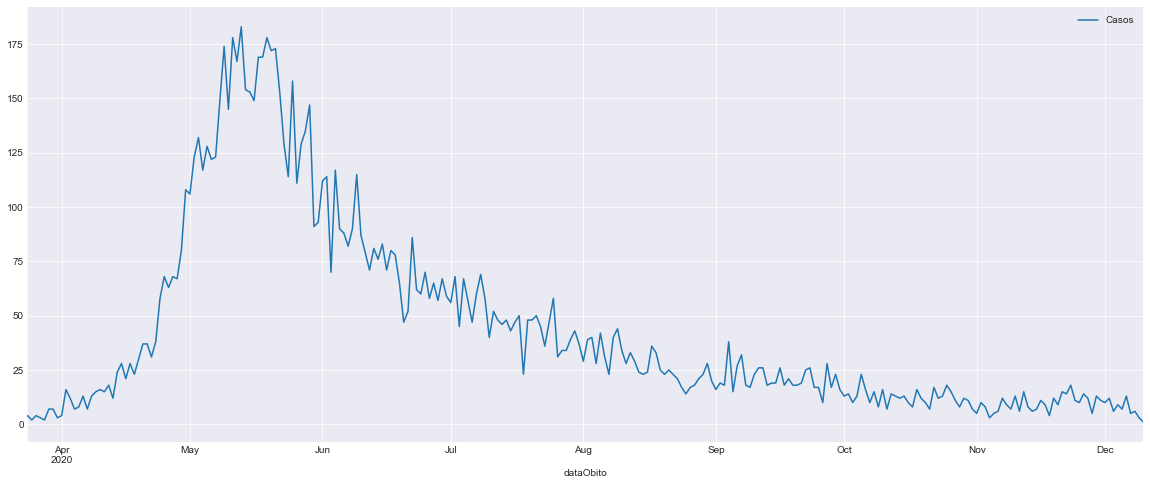

In [70]:
df_obito_confirmado = df_obito[df_obito['obitoConfirmado'] == True]

df_obito_confirmado_ts = df_obito_confirmado[['dataObito','identificadorCaso']].groupby(['dataObito']).agg('count').rename(columns={'identificadorCaso': 'Casos'})

df_obito_confirmado_ts.plot(figsize=(20,8))

In [71]:
df_obito_confirmado_mes = df_obito_confirmado[['dataObito']].groupby(df_obito_confirmado['dataObito'].dt.month).agg('count').rename(columns={'dataObito': 'Casos'})
#inserir o nome do index
df_obito_confirmado_mes #.plot(figsize=(20,8))

,Casos
dataObito,
3,32
4,965
5,4424
6,2332
7,1474
8,855
9,630
10,384
11,288


### Obitos covid-19 por Semana Epidemiológica

[]

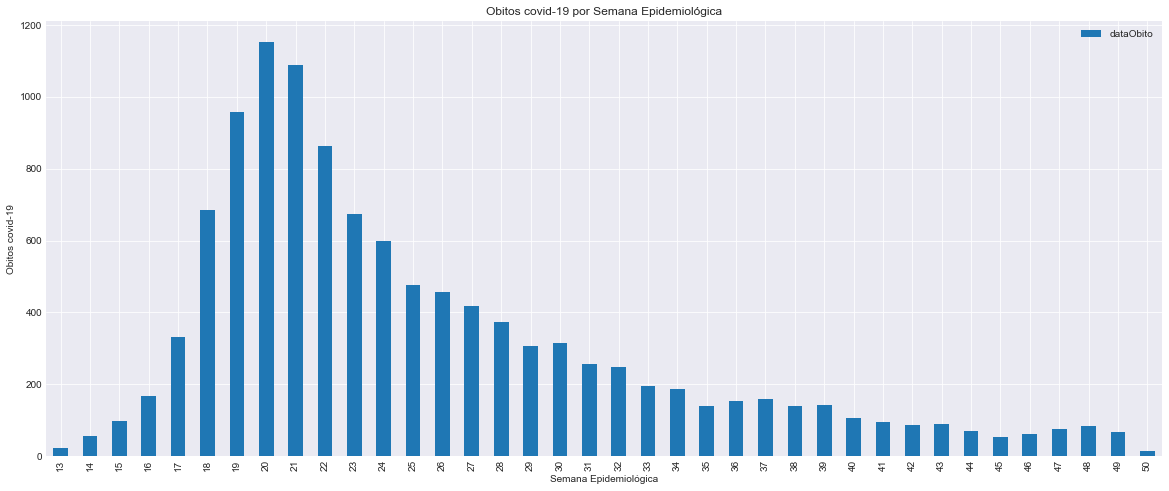

In [72]:
df_obito_confirmado_semana = df_obito_confirmado[['dataObito']].groupby(
    df_obito_confirmado['dataObito'].dt.week).agg('count')

ax = df_obito_confirmado_semana.plot(kind='bar', figsize=(20,8), title='Obitos covid-19 por Semana Epidemiológica')
ax.set_xlabel('Semana Epidemiológica')
ax.set_ylabel('Obitos covid-19')
ax.plot()

### Casos e Obitos

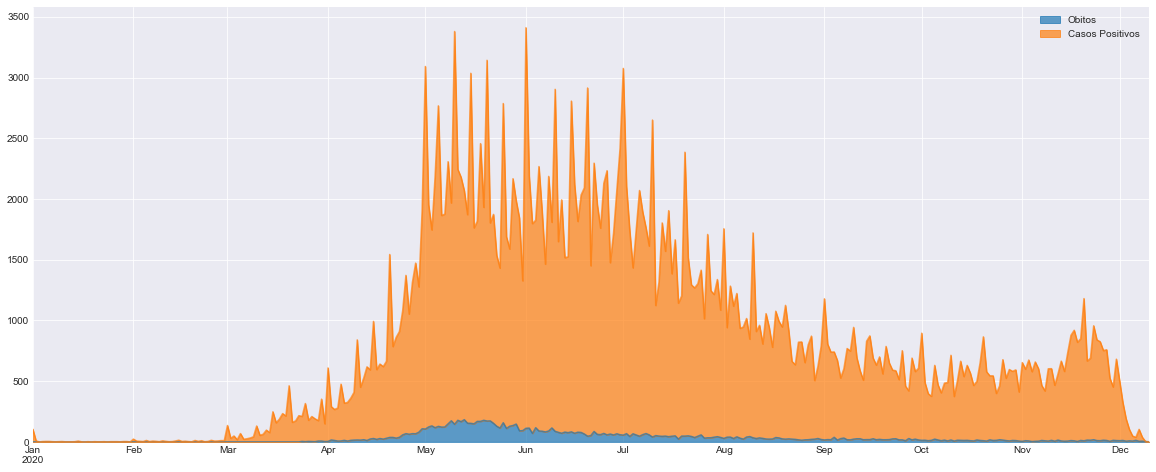

In [73]:
result = df_obito_confirmado_ts.join(df_resultados['Positivo'], how='outer')
result.columns = ['Obitos', 'Casos Positivos']
result.plot.area(figsize=(20,8), alpha=0.7)

Adicionar obitos e calcular a letalidade

In [74]:
#df_faixa_etaria = df_positovos[['dataInicioSintomas','faixaEtaria', 'sexoCaso']].groupby(['faixaEtaria', 'sexoCaso']).agg('count').rename(columns={'dataInicioSintomas': 'Casos'})

# incidencia

# heatmap

In [75]:
df_casos_municipio = df_positovos.groupby('municipioCaso').municipioCaso.count()

df_casos_municipio.sort_values(ascending=False).head()

municipioCaso
FORTALEZA            99701
JUAZEIRO DO NORTE    17852
SOBRAL               13836
CRATO                10924
MARACANAU            10666
Name: municipioCaso, dtype: int64

In [76]:
cidades_casos = df_casos_municipio.sort_values(ascending=False).head(20).index.tolist()

In [77]:
#vamos agregar por semana e municipio
df_municipio_semana = df_positovos.groupby(
    ['municipioCaso',df_positovos['dataInicioSintomas'].dt.week])[['identificadorCaso']].count().rename(columns={'codigo_caso': 'Casos'})


In [78]:

#resetar o indice 
df_municipio_semana = df_municipio_semana.reset_index()


In [79]:
df_municipio_semana

,municipioCaso,dataInicioSintomas,identificadorCaso
0,ABAIARA,17.0,1
1,ABAIARA,18.0,3
2,ABAIARA,19.0,1
3,ABAIARA,20.0,2
4,ABAIARA,22.0,2
...,...,...,...
6489,VICOSA DO CEARA,45.0,7
6490,VICOSA DO CEARA,46.0,7
6491,VICOSA DO CEARA,47.0,12
6492,VICOSA DO CEARA,48.0,5


In [80]:
#retirar os nan
df_municipio_semana['identificadorCaso'] = df_municipio_semana['identificadorCaso'].fillna(0)

In [81]:

#renomear as colunas 
df_municipio_semana.columns = ['municipio','semana', 'Casos']

#mudar o tipo da coluna semana
df_municipio_semana['semana'] = df_municipio_semana['semana'].astype('int32', errors = 'ignore')


In [82]:
df_municipio_semana_pivot = df_municipio_semana.pivot(index="municipio", columns='semana',values="Casos")

In [83]:
df_municipio_semana_pivot = df_municipio_semana_pivot.loc[cidades_casos].fillna(0)

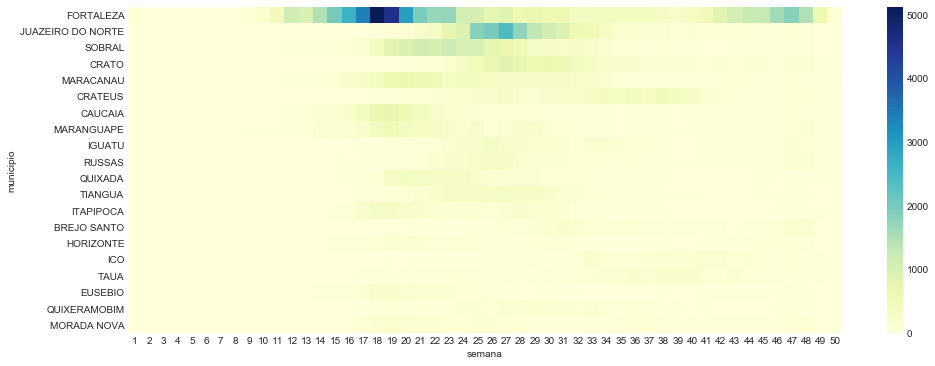

In [84]:
import seaborn as sns

plt.figure(figsize=(16, 6))
ax = sns.heatmap(df_municipio_semana_pivot.loc[cidades_casos], cmap="YlGnBu")

In [85]:
heatmap_municipios = df_municipio_semana_pivot

In [86]:
for cidade in cidades_casos:
  total = df_municipio_semana_pivot.loc[cidade].sum()
  heatmap_municipios.loc[cidade] = heatmap_municipios.loc[cidade].apply(lambda x: x/total)

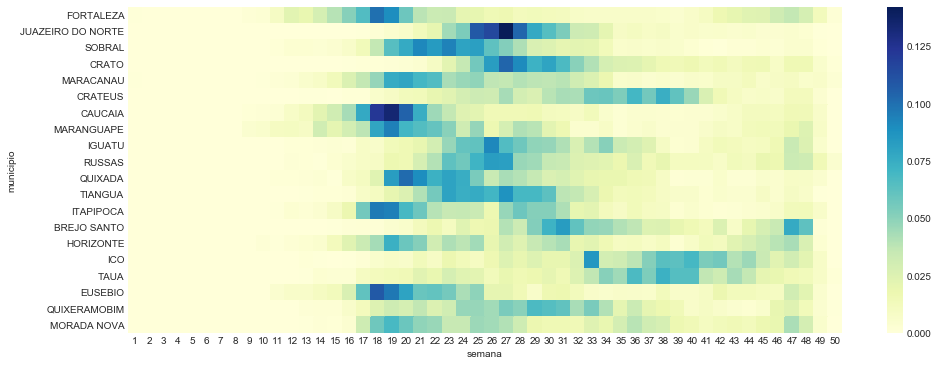

In [87]:
plt.figure(figsize=(16, 6))
sns.heatmap(heatmap_municipios.loc[cidades_casos], cmap="YlGnBu")

# Radar por municipio 

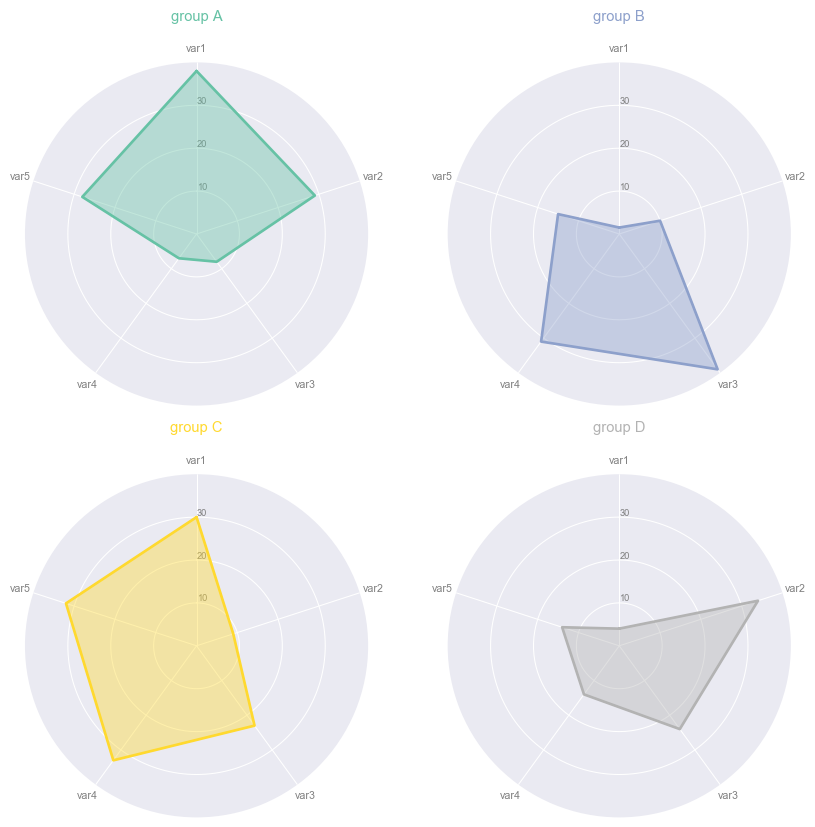

In [88]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
 
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):
 
    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    plt.ylim(0,40)

    # Ind1
    values=df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

# ------- PART 2: Apply to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title='group '+df['group'][row], color=my_palette(row))


In [89]:
df_mun_pos = df_positovos[['dataInicioSintomas','municipioCaso','sexoCaso']].groupby(
    ['municipioCaso','sexoCaso']).agg('count').rename(columns={'dataInicioSintomas': 'Casos'})


df_mun_pos = df_mun_pos.reset_index()

df_mun_pos = df_mun_pos.pivot(index='municipioCaso',columns='sexoCaso',values='Casos')

ts = df_obito[['obitoConfirmado','municipioCaso', 'sexoCaso']].groupby(['municipioCaso', 'sexoCaso']).agg('count')

df_obito_ts = ts.reset_index()

df_obito_ts =  df_obito_ts.pivot(index='municipioCaso', columns='sexoCaso', values='obitoConfirmado')

df_obito_ts = df_obito_ts.fillna(0)

df_merge = pd.merge(df_mun_pos, df_obito_ts, left_index=True, right_index=True)

df_merge = df_merge.reset_index()

# Wireframe

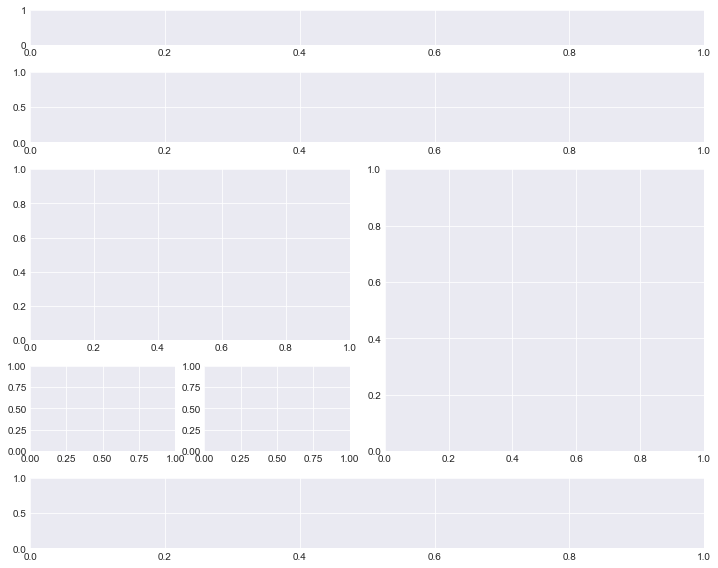

In [90]:
import matplotlib as mpl
# Construindo as camadas (sem os dados)
figure = plt.figure(figsize=(10, 8))
gs_master = mpl.gridspec.GridSpec(4, 2, height_ratios=[1, 2, 8, 2])

# Camada 1 - Title
gs_1 = mpl.gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs_master[0, :])
title_axes = figure.add_subplot(gs_1[0])

# Camada 2 - Price
gs_2 = mpl.gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs_master[1, :])
price_axes = figure.add_subplot(gs_2[0])

# Camada 3 - Risks & Radar
gs_31 = mpl.gridspec.GridSpecFromSubplotSpec(2, 2, height_ratios=[2, 1], subplot_spec=gs_master[2, :1])
risk_and_loss_axes = figure.add_subplot(gs_31[0, :])
risk_axes = figure.add_subplot(gs_31[1, :1])
loss_axes = figure.add_subplot(gs_31[1:, 1])
gs_32 = mpl.gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs_master[2, 1])
radar_axes = figure.add_subplot(gs_32[0])

# Camada 4 - MPG
gs_4 = mpl.gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs_master[3, :])
mpg_axes = figure.add_subplot(gs_4[0])

# Une as camadas, ainda sem dados
gs_master.tight_layout(figure)
plt.show()

# Obrigado!